In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import butter
import numpy as np

In [102]:
df=pd.read_table('./erd_ers/y_erders.txt',sep='\t',encoding='cp949')

In [103]:
df

,Time,EEG_Fp1,EEG_Fp2,PPG
0,오후 4:49:11.497,0.000033,0.000025,0.000910
1,오후 4:49:11.497,0.000035,0.000029,0.000910
2,오후 4:49:11.521,0.000034,0.000032,0.000910
3,오후 4:49:11.521,0.000035,0.000018,0.000910
4,오후 4:49:11.537,0.000038,0.000015,0.000910
...,...,...,...,...
50921,오후 4:52:42.509,0.000063,0.000068,0.000915
50922,오후 4:52:42.512,0.000072,0.000076,0.000915
50923,오후 4:52:42.512,0.000058,0.000056,0.000915
50924,오후 4:52:42.523,0.000044,0.000047,0.000914


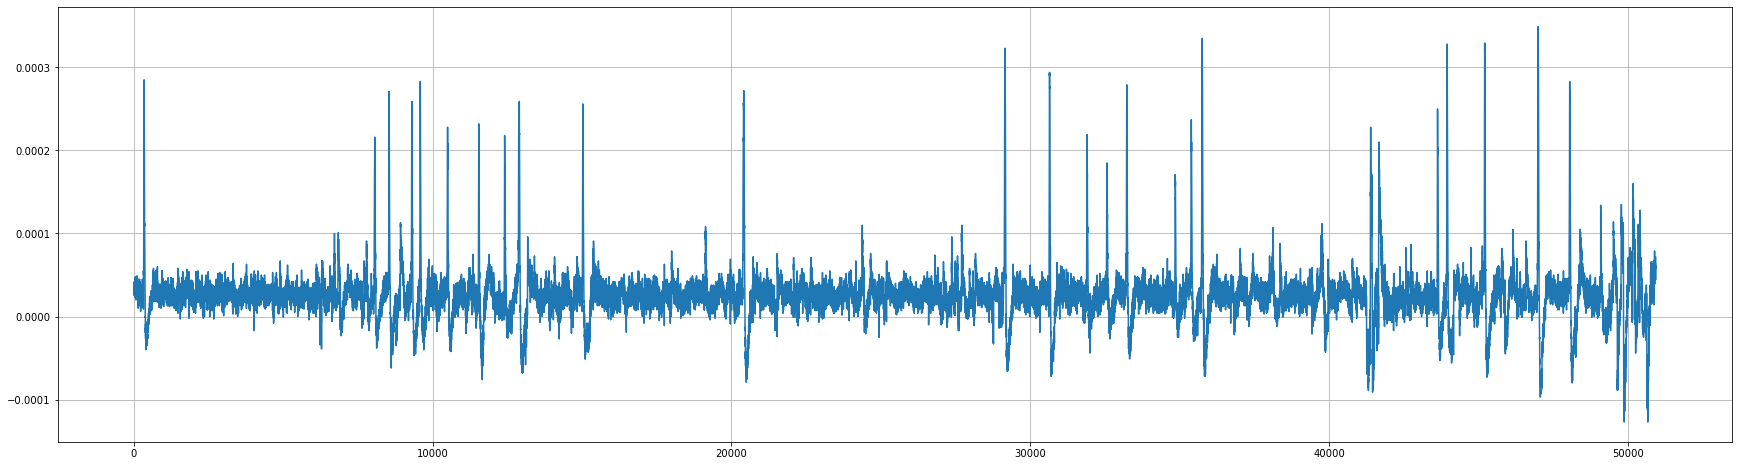

In [104]:
%matplotlib inline
plt.rcParams["figure.figsize"]=(30,8)
plt.rcParams["lines.color"]='b'
plt.rcParams['axes.grid']=True
plt.plot(df['EEG_Fp1'])
plt.show()

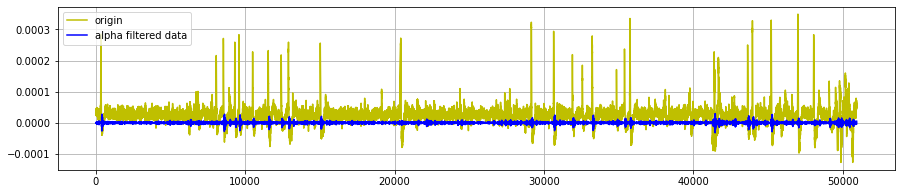

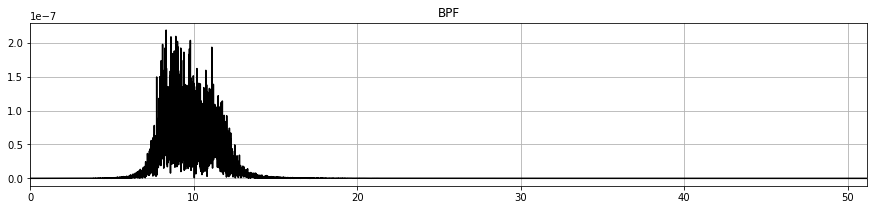

In [179]:
#https://alice-secreta.tistory.com/23
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sig.lfilter(b, a, data)
    return y

z=df['EEG_Fp1']
Fs=256
Ts=1/Fs
N=len(z)
k=np.arange(N)
T=N/Fs
freq=k/T
freq=freq[range(int(N/2))]

# BPF setting ( 나머지 주파수는 자르고 8~12hz 만 추출하겠다.)
lowcut = 8.0
highcut = 12.0
    
# BPF
yy = butter_bandpass_filter(z, lowcut, highcut, Fs, order=5)

plt.rcParams["figure.figsize"]=(15,3)

# 1. 원 신호 Plot
plt.plot(z, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(yy, 'b', label='alpha filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 5)
plt.show()

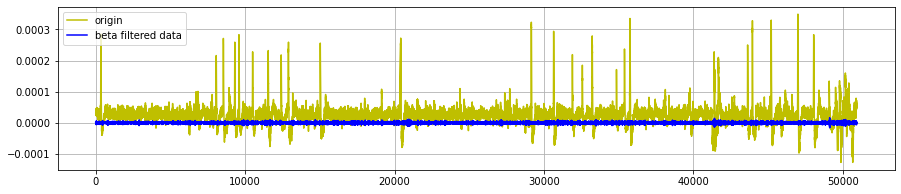

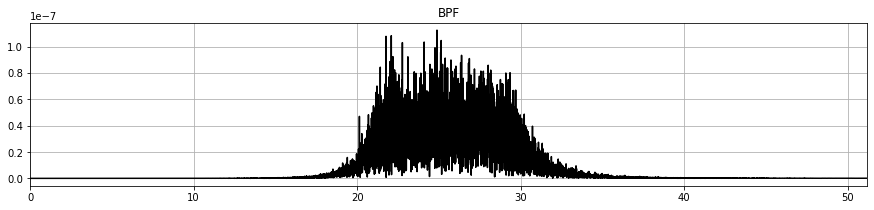

In [180]:
#베타파

# BPF setting ( 나머지 주파수는 자르고 8~11hz 만 추출하겠다.)
lowcut = 21.0
highcut = 30.0
    
# BPF
yy = butter_bandpass_filter(z, lowcut, highcut, Fs, order=5)

# 1. 원 신호 Plot
plt.plot(z, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(yy, 'b', label='beta filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 5)
plt.show()

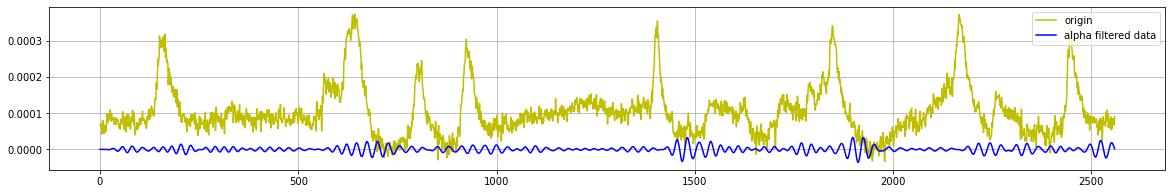

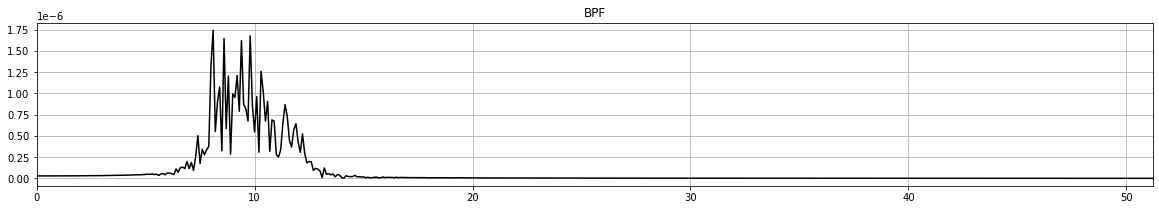

In [171]:
# 이제부터 조금만 짤라서 합치기, 10초: 4회
zz=df['EEG_Fp1'][4578:7138] #2560씩
zz=zz.reset_index(drop=False,inplace=False) #index 초기화
del zz['index']
zz=pd.DataFrame(zz)
zz['EEG_Fp1']+=df['EEG_Fp1'][7138:9698].values
zz['EEG_Fp1']+=df['EEG_Fp1'][9698:12258].values
zz['EEG_Fp1']+=df['EEG_Fp1'][12258:14818].values

Fs=256
Ts=1/Fs
N=len(zz)
k=np.arange(N)
T=N/Fs
freq=k/T
freq=freq[range(int(N/2))]

# BPF setting ( 나머지 주파수는 자르고 8~12hz 만 추출하겠다.)
lowcut = 8.0
highcut = 12.0
    
# BPF
alpha = butter_bandpass_filter(zz['EEG_Fp1'].values, lowcut, highcut, Fs, order=5)

plt.rcParams["figure.figsize"]=(20,3)

# 1. 원 신호 Plot
plt.plot(zz, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(alpha, 'b', label='alpha filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(alpha) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 5)
plt.show()

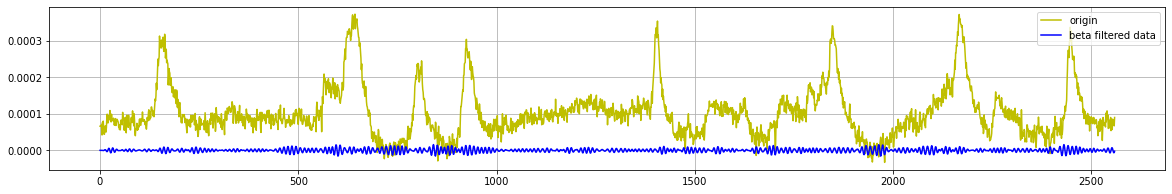

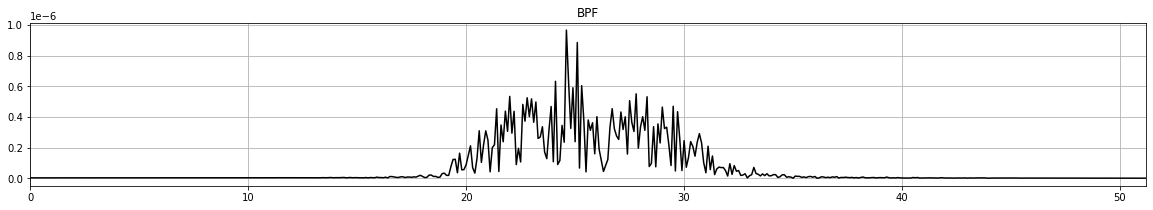

In [172]:
# BPF setting ( 나머지 주파수는 자르고 8~12hz 만 추출하겠다.)
lowcut = 21.0
highcut = 30.0
    
# BPF
beta = butter_bandpass_filter(zz['EEG_Fp1'].values, lowcut, highcut, Fs, order=5)

# 1. 원 신호 Plot
plt.plot(zz, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(beta, 'b', label='beta filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(beta) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 5)
plt.show()

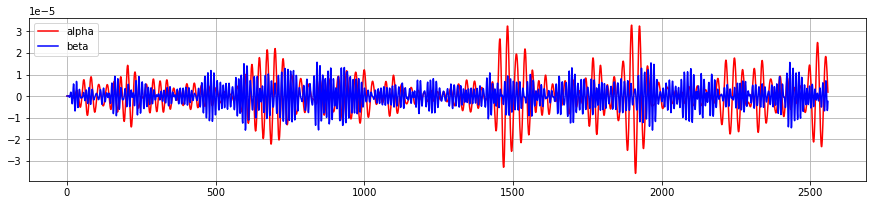

In [185]:
plt.rcParams["figure.figsize"]=(15,3)
plt.plot(alpha, 'r', label='alpha')
plt.plot(beta, 'b', label='beta')
plt.legend()
plt.show() 

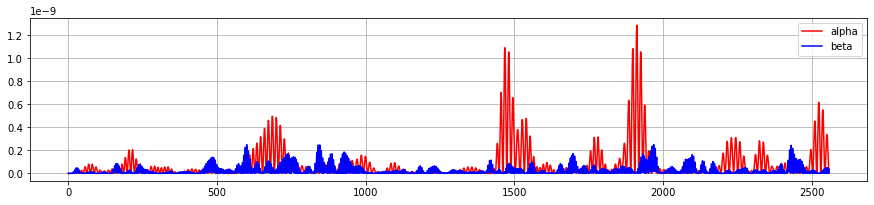

In [186]:
#squaring
alpha_s=alpha*alpha
beta_s=beta*beta
plt.plot(alpha_s, 'r', label='alpha')
plt.plot(beta_s, 'b', label='beta')
plt.legend()
plt.show() 

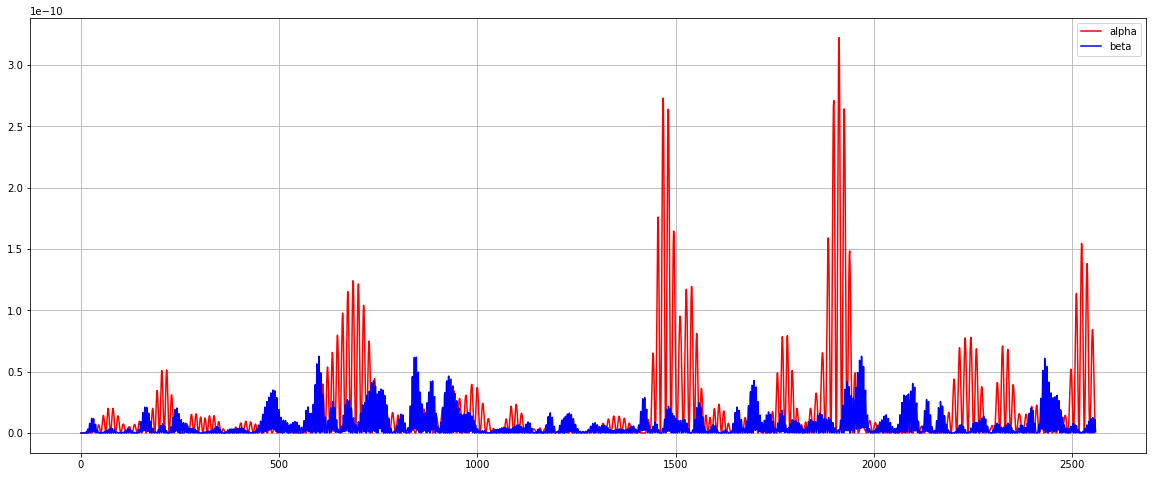

In [166]:
#average of n trials
#squaring
alpha_n=alpha_s/4
beta_n=beta_s/4
plt.rcParams["figure.figsize"]=(20,8)
plt.plot(alpha_n, 'r', label='alpha')
plt.plot(beta_n, 'b', label='beta')
plt.legend()
plt.show() 

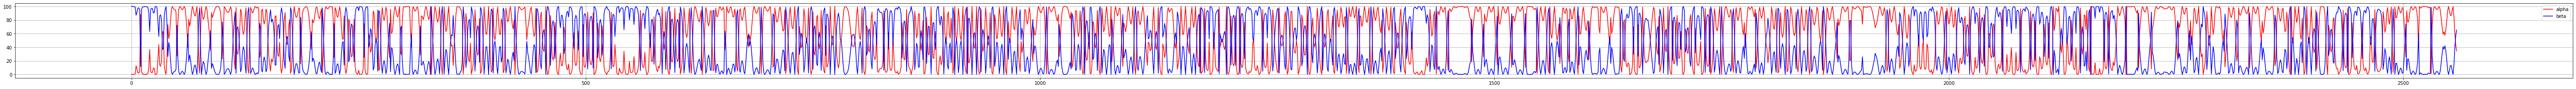

In [165]:
#relative power
alpha_rp=(alpha_n/(alpha_n+beta_n))*100
beta_rp=(beta_n/(alpha_n+beta_n))*100

plt.rcParams["figure.figsize"]=(100,3)

plt.plot(alpha_rp, 'r', label='alpha')
plt.plot(beta_rp, 'b', label='beta')
plt.legend()
plt.show() 